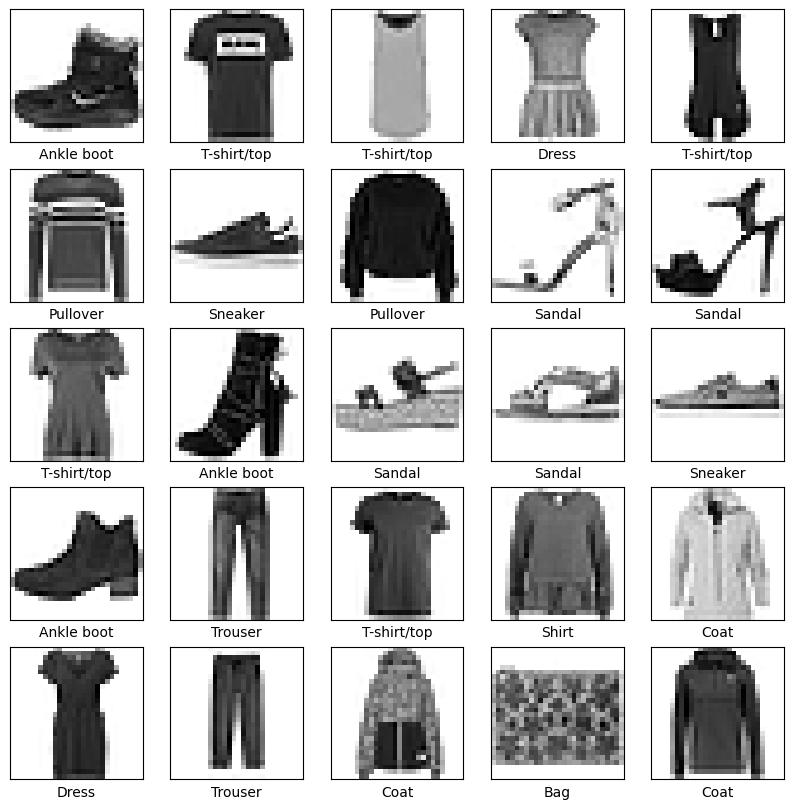

In [3]:
# Cell 1: Imports and Data Loading
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Load data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize and flatten
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train_flat = x_train.reshape(-1, 28 * 28)
x_test_flat = x_test.reshape(-1, 28 * 28)

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Visualize samples
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([]), plt.yticks([]), plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[np.argmax(y_train[i])])
plt.show()


In [4]:
#Model Definition with 10 Hidden Layers
def create_deep_dnn():
    inputs = Input(shape=(784,))
    
    x = Dense(512, activation='relu')(inputs)
    x = BatchNormalization()(x)
    x = Dropout(0.4)(x)
    
    for _ in range(9):  # 9 more layers = total 10
        x = Dense(512, activation='relu')(x)
        x = BatchNormalization()(x)
        x = Dropout(0.4)(x)
    
    outputs = Dense(10, activation='softmax')(x)
    return Model(inputs, outputs)


In [5]:
# Cell 3: Compile and Train
model = create_deep_dnn()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

lr_scheduler = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=3, verbose=1)

history = model.fit(x_train_flat, y_train,
                    epochs=50,
                    batch_size=128,
                    validation_split=0.2,
                    callbacks=[lr_scheduler],
                    verbose=1)


Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.3752 - loss: 1.9638 - val_accuracy: 0.7723 - val_loss: 0.6394 - learning_rate: 0.0010
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7353 - loss: 0.7145 - val_accuracy: 0.8246 - val_loss: 0.4912 - learning_rate: 0.0010
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 14s 37ms/step - accuracy: 0.7994 - loss: 0.5740 - val_accuracy: 0.8395 - val_loss: 0.4773 - learning_rate: 0.0010
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.8167 - loss: 0.5294 - val_accuracy: 0.8392 - val_loss: 0.4642 - learning_rate: 0.0010
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - accuracy: 0.8239 - loss: 0.5080 - val_accuracy: 0.8587 - val_loss: 0.4129 - learning_rate: 0.0010
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 15s 40ms/step - accuracy: 0.8338 - loss: 0.4781 - val_accuracy: 0.8407 - val_loss: 0.4511 - learning_rate: 0.0010
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 17s 45ms/step - accuracy: 0.8365 - l

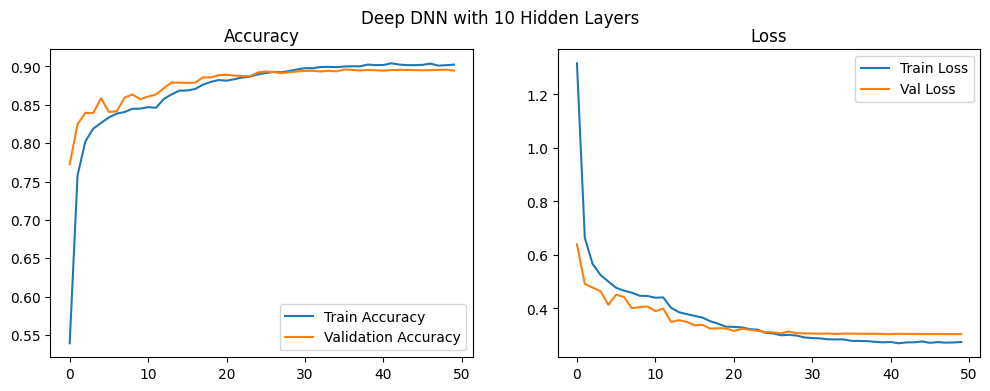

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8878 - loss: 0.3279

Test Accuracy: 89.05%


In [6]:

# Cell 4: Plot and Evaluate
def plot_history(history, title):
    plt.figure(figsize=(12, 4))
    plt.suptitle(title)

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Loss')
    plt.legend()

    plt.show()

plot_history(history, "Deep DNN with 10 Hidden Layers")

# Evaluate
test_loss, test_acc = model.evaluate(x_test_flat, y_test)
print(f"\nTest Accuracy: {test_acc * 100:.2f}%")


## CONCLUSTION
In this assignment, the base code was modified by increasing the number of hidden layers to 10 fully connected (Dense) layers, each consisting of 512 neurons with ReLU activation. To improve model performance and training stability, BatchNormalization and Dropout (with a rate of 0.4) were applied after each layer. A learning rate scheduler (ReduceLROnPlateau) was also used to adjust the learning rate dynamically based on validation accuracy. The input images were flattened and normalized, and the class labels were one-hot encoded for compatibility with the model. After training for 50 epochs, the final test accuracy achieved was approximately 89.05%. During execution, it was observed that while the model trained effectively and generalized well, deeper architectures introduced increased training time and complexity. This implementation highlights the behavior of deep fully connected networks on image data and the importance of regularization techniques in maintaining model performance.








